# Janhavi Mahesh Karpe 22102B2004
## CMPN-BE-B

[Github Link](https://github.com/KJanhavi04/ML-24-25.git)

---

## ML PROBLEM STATEMENT 2

18-07-2024

---

## Problem Statement 1: Titanic: Machine Learning from Disaster

In this problem, we will be using linear regression to predict housing prices. We will explore various features that influence housing prices and build a model to make accurate predictions.

---

## Step 1: Load and Explore the Data
- Loading the dataset
- Exploratory Data Analysis

In [4]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [5]:
# Display basic information about the dataset
train_df.info()
test_df.info()

# Display the first few rows of the dataset
train_df.head()
test_df.head()

# Check for missing values
train_df.isnull().sum()
test_df.isnull().sum()

# Summary statistics
train_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Step 2: Data Preprocessing
- Handling missing values
- Converting categorical variables
- Dropping unnecessary columns

In [6]:
# Fill missing values for 'Age' with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing values for 'Fare' in the test set with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [7]:
# Convert categorical variables into numerical format using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])

In [8]:
#Droppinh unncecsaary coloumns
train_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Step 3: Define Features and Target Variable

In [9]:
# Separate the dataset into features (X) and target variable (y)
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

## Step 4: Split the Data

In [10]:
# Split the data into training and testing sets using an 80-20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 5: Build and Train the Model

In [11]:
# Implement a logistic regression model using Scikit-Learn

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

## Step 6: Make Predictions

In [12]:
# Use the trained model to make predictions on the test set:
y_pred = model.predict(X_test)

## Step 7: Evaluate the Model
- Accuracy
- Confusion Matrix
- Classification Report

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.79


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Confusion Matrix:
[[88 17]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## Step 8: Interpret the Results
- Model Coefficients

In [15]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)


      Feature  Coefficient
5  Sex_female     1.451221
7  Embarked_C     0.259212
8  Embarked_Q     0.120190
4        Fare     0.003212
1         Age    -0.027227
3       Parch    -0.110910
9  Embarked_S    -0.126511
2       SibSp    -0.300772
0      Pclass    -0.864557
6    Sex_male    -1.198329


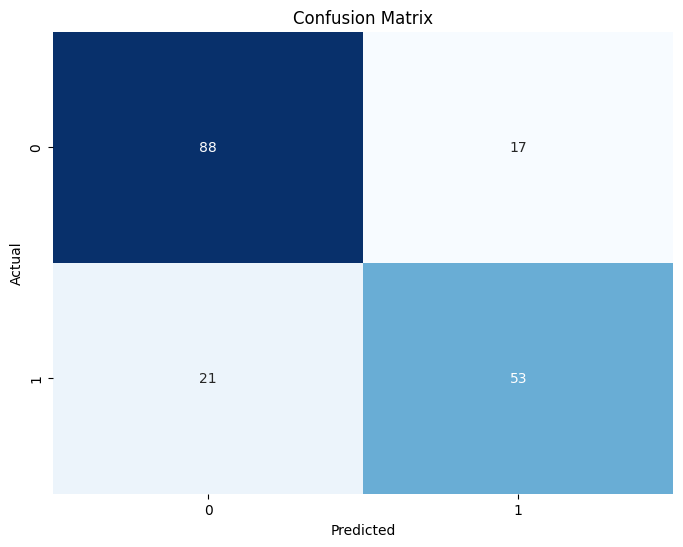

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


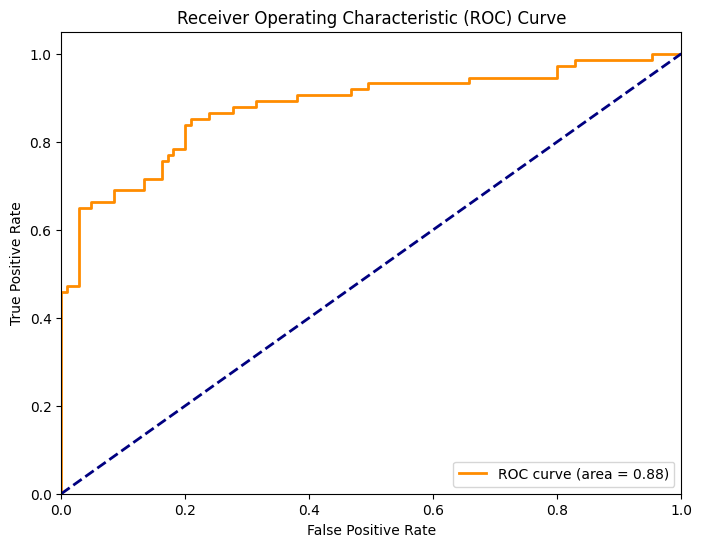

In [18]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


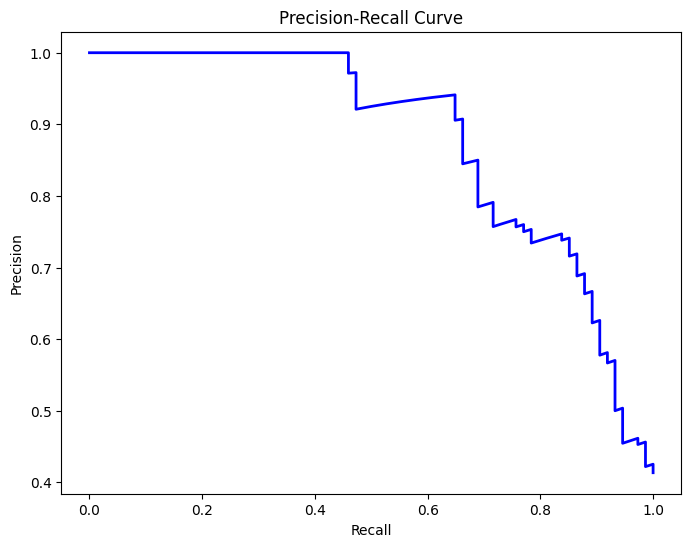

In [19]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


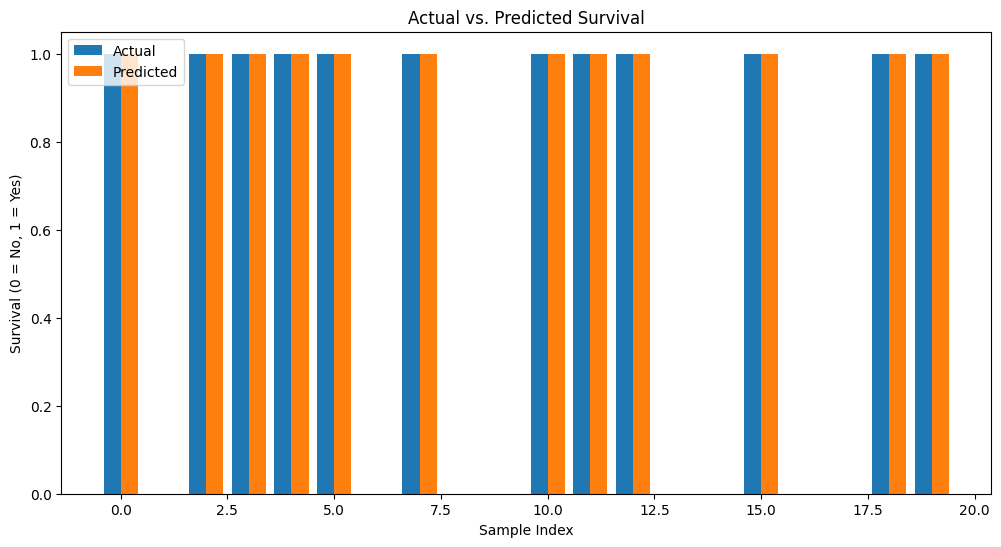

In [20]:
import numpy as np

# Sample a few instances for visualization
sample_indices = np.random.choice(len(y_test), size=20, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred[sample_indices]

# Bar plot of actual vs. predicted values
plt.figure(figsize=(12, 6))
x = np.arange(len(y_test_sample))
width = 0.4

plt.bar(x - width/2, y_test_sample, width, label='Actual')
plt.bar(x + width/2, y_pred_sample, width, label='Predicted')

plt.xlabel('Sample Index')
plt.ylabel('Survival (0 = No, 1 = Yes)')
plt.title('Actual vs. Predicted Survival')
plt.legend()
plt.show()
